In [2]:
from voilagaze_dataset import *

In [5]:
import argparse
from tqdm import tqdm
import json
from transformers import AutoTokenizer
# parser = argparse.ArgumentParser()
# parser.add_argument("--task", type=str, default="voila")
# parser.add_argument("--max_src_length", type=int, default=256)
# parser.add_argument("--max_tgt_length", type=int, default=256)
# parser.add_argument("--patch_image_size", type=int, default=224)
# parser.add_argument("--seed", type=int, default=42)
# # parser.add_argument("--data_dir", type=str, default="/mnt/lustre/yhzhang/Otter/pipeline/multi_instruct_data_utils/data")
# parser.add_argument("--voila_path", type=str, default="voila_anno.json")
# parser.add_argument("--images_path", type=str, default="voila_image.json")
# parser.add_argument("--train_config_path", type=str, default="voila_meta.json")
# args = parser.parse_args()
args = argparse.Namespace()
args.task = "voila"
args.max_src_length = 256
args.max_tgt_length = 256
args.patch_image_size = 224
args.seed = 42
args.voila_path = "voila_anno.json"
args.images_path = "voila_image.json"
args.train_config_path = "voila_meta.json"


args.tokenizer = text_tokenizer = AutoTokenizer.from_pretrained("mosaicml/mpt-7b-instruct")
dataset = VoilaDataset(args, args.voila_path, args.images_path, args.train_config_path)
num = len(dataset)
q_list = []
iq_list = []
a_list = []
for i in tqdm(range(num)):
    try:
        data = dataset[i]
        q_list.append(data['question'])
        iq_list.append(data['in_question'])
        a_list.append(data['answer'])
        # print(data)
        # print(data.keys())
    except Exception as e:
        pass
        # raise e
    # break

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|██████████| 70115/70115 [00:00<00:00, 400126.84it/s]


In [20]:
print(len(iq_list))
print(iq_list[0])
iq_list = [iq for iq in iq_list if iq is not None]

70115
Who is there behind her?


In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# % matplotlib inline

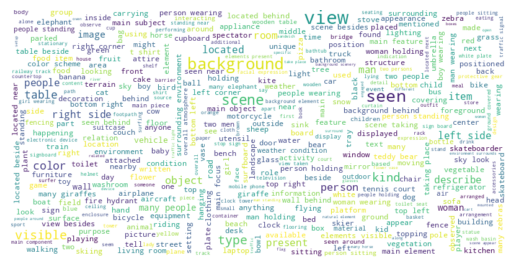

In [32]:
stopwords = set(STOPWORDS)
stopwords.update(["mWhat", "mhow"])
wordcloud = WordCloud(stopwords=stopwords,max_font_size=30, max_words=400, background_color="white", width=800, height=400).generate("\n".join(q_list))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

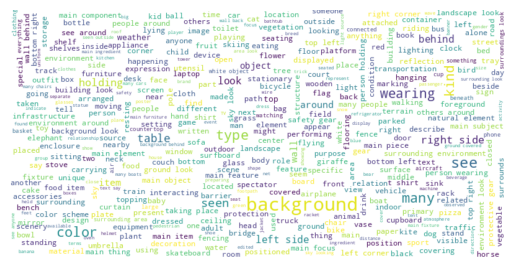

In [31]:
stopwords = set(STOPWORDS)
stopwords.update(["mWhat", "mhow"])
wordcloud = WordCloud(stopwords=stopwords,max_font_size=30, max_words=400, background_color="white",width=800, height=400).generate("\n".join(iq_list))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

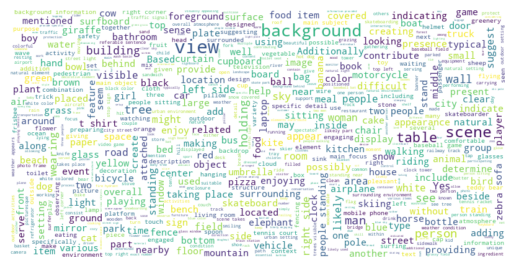

In [30]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,max_font_size=30, max_words=600, background_color="white",width=800, height=400).generate("\n".join(a_list))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

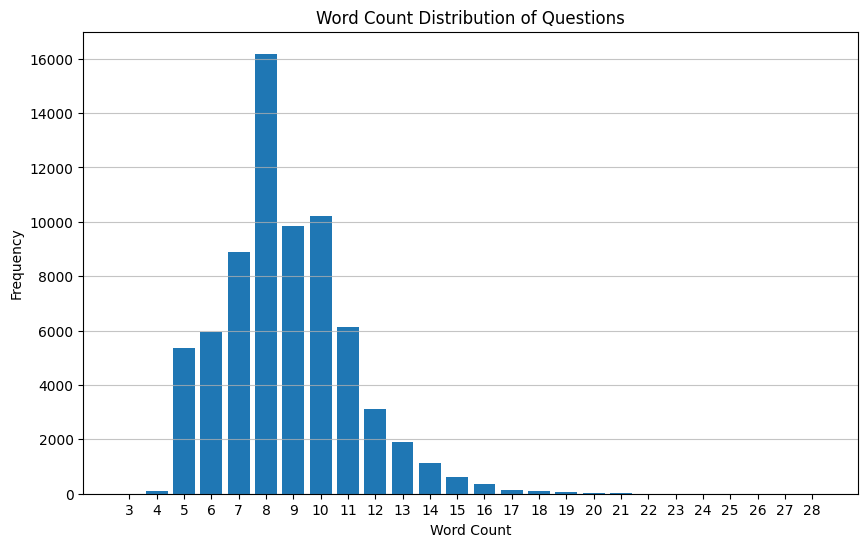

In [36]:
sentences = q_list
# Calculate word counts for each sentence
word_counts = [len(sentence.split()) for sentence in sentences]

# Visualize the word count distributions
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=range(min(word_counts), max(word_counts) + 2), align='left', rwidth=0.8)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution of Questions')
plt.xticks(range(min(word_counts), max(word_counts) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

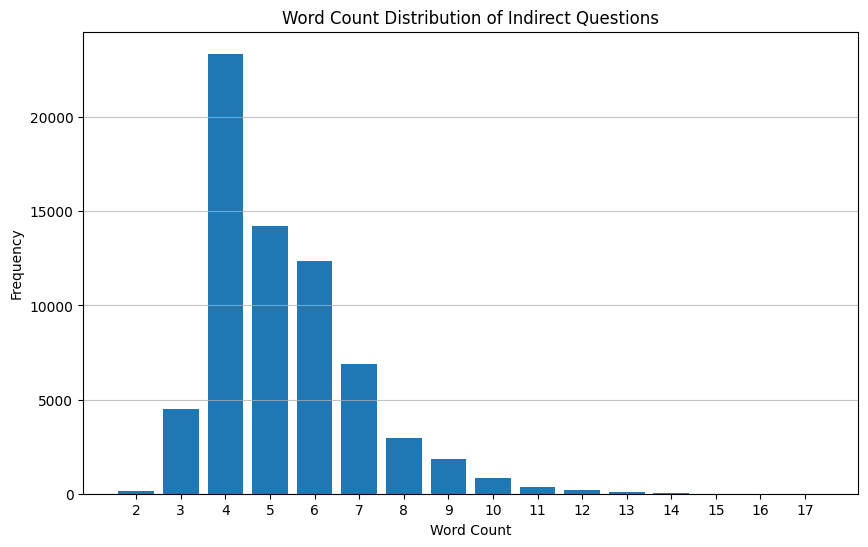

In [37]:
sentences = iq_list
# Calculate word counts for each sentence
word_counts = [len(sentence.split()) for sentence in sentences]

# Visualize the word count distributions
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=range(min(word_counts), max(word_counts) + 2), align='left', rwidth=0.8)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution of Indirect Questions')
plt.xticks(range(min(word_counts), max(word_counts) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

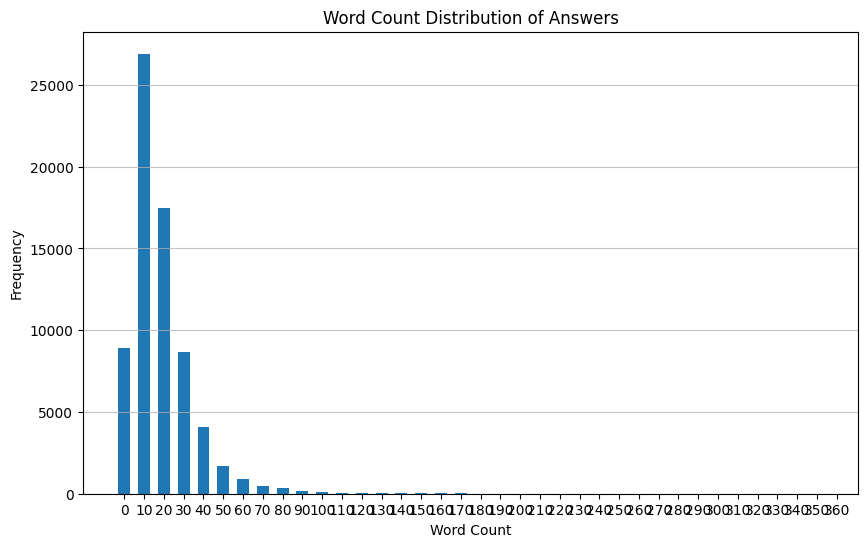

In [45]:
sentences = a_list
# Calculate word counts for each sentence
word_counts = [len(sentence.split()) for sentence in sentences]

# Visualize the word count distributions
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=range(0, max(word_counts) + 2, 10), align='left', rwidth=0.6)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution of Answers')
plt.xticks(range(0, max(word_counts) + 1, 10))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [53]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models
import pyLDAvis
from gensim.parsing.preprocessing import STOPWORDS
# List of sentences (corpus)
sentences = a_list

# Tokenize the sentences
# tokenized_sentences = [sentence.lower().split() for sentence in sentences]
tokenized_sentences = [[word for word in sentence.lower().split() if word not in STOPWORDS] for sentence in sentences]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_sentences)

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in tokenized_sentences]

# Build the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=100, id2word=dictionary, passes=40)

# Visualize the topics
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)